# <a id='toc1_'></a>[YOUR PROJECT TITLE](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [YOUR PROJECT TITLE](#toc1_)    
- [Read and clean data](#toc2_)    
  - [Explore each data set](#toc2_1_)    
- [Clean House data](#toc3_)    
- [Merge data sets](#toc4_)    
- [Analysis](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Import of libraries

In [ ]:
# Import libraries
import yfinance as yf
import dataprojectyf as dp
import ipywidgets as wg

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# <a id='toc2_'></a>[Read and clean data](#toc0_)

Import your data, either through an API or manually, and load it. 

## <a id='toc2_1_'></a>[Explore each data set](#toc0_)

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

In [ ]:
# a. fetch the data for the house representatives
house_raw = dp.fetch_data(print_df = True)

# b. fech example data from yfinance
example_yf = yf.download("AAPL", "2022-03-01", "2022-03-14", interval="1d")

display(example_yf)


# <a id='toc3_'></a>[Clean House data](#toc0_)

In [ ]:
# a. clean the data
house_clean = dp.clean_data(house_raw, print_df = True)


# <a id='toc4_'></a>[Merge data sets](#toc0_)

- First we narrow down our dataset to only look at 1 representative with ```dp.select_rep```. This function filters down the data to the chosen representative.
- Next the function ```dp.get_stock_data``` creates a list of all stock tickers in the filtered data and finds the min date. With this it pulls the Adj. Close price for each day for each ticker from Yahoo Finance for the period min date until today.
- The function ```dp.merge_data``` then merges the two dataframes with a right outerjoin on date and ticker to include all days where markets have been open. After this we remove all data for each ticker before the first registered purchase of a stock

In [ ]:
# a. select the data for a specific representative
rep_df = dp.select_rep(house_clean, "Nancy Pelosi", print_df = False)

# b. get the stock data for the selected representative
stocks_price = dp.get_stock_data(rep_df, print_df = False)

# c. merge the data
df_merge = dp.merge_data(rep_df, stocks_price, print_df = True)


# <a id='toc5_'></a>[Analysis](#toc0_)

- With information on purchases, sales and prices we can now recreate the portfolio with ```dp.portfolio``` under a few assumptions;
    - A *purchase* we assume the representative has purchased the shares at the adjust close value and that the amount spend on the shares is the average between the min_amount and max_amount.
    - A *partial sales* will always be a sale of 50 % of the shares of the given stock.
    - A *full sale* will sell all stocks of the given ticker
- From the *synthetic* portfolio that we have created, we can calculate the weighted return for each stock, and thus the portfolio return for any given day. This is done with the function ```dp.daily_return```.
- Lastly we plot the cummulated return on the portfolio against the cummulated return of the S&P 500 for the same period with ```dp.plot_return```

In [ ]:
# a. calculate portfolio
portfolio_df = dp.portfolio(df_merge, print_df = False)

# b. calculate daily return
daily_return = dp.daily_return(portfolio_df, print_df = False)

# c. plot cummulated return
dp.plot_return(daily_return, include_sp500=True)

As seen from above Nancy Pelosi has done quite well for the past couple of years beating the S&P 500.

Below we have created a widget allowing you to select a house representative and see how they have done compared to the S&P 500

Dropdown(description='Representative:', options=('Abigail Spanberger', 'Adam B. Schiff', 'Adam Kinzinger', 'Al…

[*********************100%***********************]  64 of 64 completed

2 Failed downloads:
- BOA: No data found for this date range, symbol may be delisted
- DAWC: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


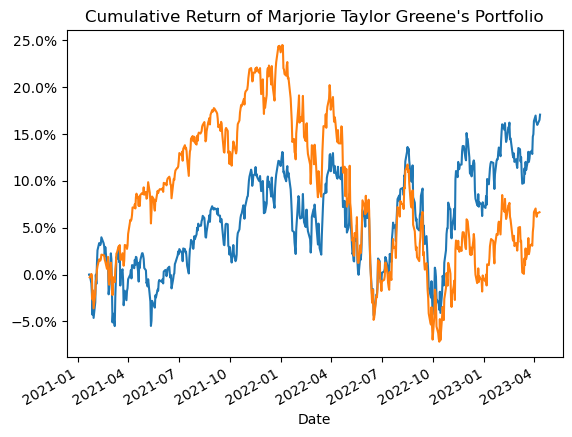

In [ ]:
# Create the dropdown widget
reps = house_clean["representative"].unique().tolist()
rep_selector = wg.Dropdown(options=reps, description='Representative:')

if __name__ == "__main__":
    dp.display(rep_selector)

    # Observe the changes in the dropdown and update the plot accordingly
    rep_selector.observe(lambda change: dp.widget(house_clean,change.new) if change.name == 'value' else None, names='value')
